# Unsupervised ML

This workshop is divided in three main parts, and contains a recap of the 10 songs on the platform: 

1. Concept of distances (Monday)
2. K-means algorithm (Tuesday)
3. Recap: example 10 spotify songs
4. Model performance evaluation (Wednesday)

## Distances

### Manhattan distance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/food_ratings - DA002.csv', index_col='student')
df.drop(['age','favorite_color'], axis=1, inplace=True)
df

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky
student,,,,,,,,,
Amabel,5,5,0,0,0,10,10,0,5
Angelika,8,7,9,4,6,10,8,2,3
Aruna,9,10,0,0,0,9,9,0,0
Ben,8,8,0,0,4,7,9,0,9
Luana,8,7,5,2,6,8,10,10,9
Lydia,10,9,10,0,5,10,5,4,0
Rajarshi Roy,9,5,7,1,2,2,4,3,10
Somyeong,10,7,6,10,6,10,5,6,1
Soniya,10,5,0,0,5,10,5,5,0


In [3]:
# example Mahattan distance
# between user 1 and 2
sample = df.iloc[0:2,0:3]
sample

,broccoli,brussels_sprouts,hamburger
student,,,
Amabel,5,5,0
Angelika,8,7,9


#### Example 1: 2 students with 2 ratings

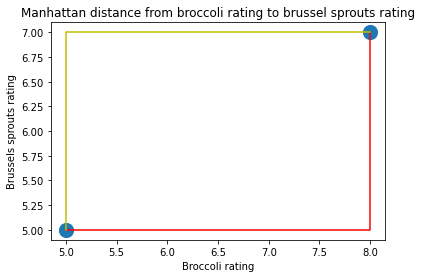

In [4]:
# plot the manhattan distance between two points
# plot rattings
plt.scatter(sample['broccoli'], sample['brussels_sprouts'], s=200)

# # possibility 1 manhattan distance
y = [5, 5, 7]
x = [5, 8, 8]
plt.plot(x, y, c='r')

# # possibility 2 manhattan distance
y = [5, 7, 7]
x = [5, 5, 8]
plt.plot(x, y, c='y')

# plt.xlim(-1, 11)
# plt.ylim(-1, 11)
plt.title('Manhattan distance from broccoli rating to brussel sprouts rating')
plt.xlabel('Broccoli rating')
plt.ylabel('Brussels sprouts rating')
plt.show()

In [5]:
sample

,broccoli,brussels_sprouts,hamburger
student,,,
Amabel,5,5,0
Angelika,8,7,9


#### Example 2: Distance between 2 students with 3 ratings

In [6]:
# distance user 1 and user 2 for broccoli
md_m1_users1to2 = abs(sample.iloc[0,0] - sample.iloc[1,0])
md_m1_users1to2

3

In [7]:
# distance user 1 and user 2 for brussel_sprouts
md_m2_users1to2 = abs(sample.iloc[0,1] - sample.iloc[1,1])
md_m2_users1to2

2

In [8]:
# distance user 1 and user 2 for hamburguer
md_m3_users1to2 = abs(sample.iloc[0,2] - sample.iloc[1,2])
md_m3_users1to2

9

In [9]:
# and now to calculate the distance between both users, it will be
md_users1to2 = md_m1_users1to2 + md_m2_users1to2 + md_m3_users1to2
md_users1to2

14

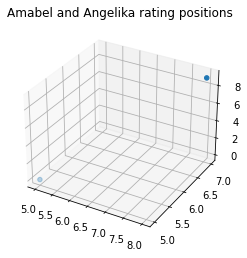

In [10]:
# how can we visualize that?
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Amabel and Angelika rating positions')
ax.scatter(xs=sample['broccoli'], ys=sample['brussels_sprouts'], zs=sample['hamburger'])
plt.show()

#### CHALLENGE: Calculating Manhattan distance between all the students for three foods

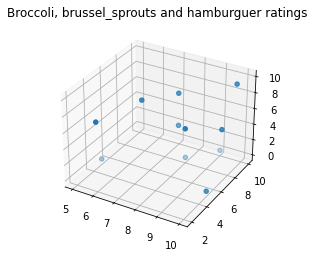

In [11]:
# how can we visualize that?
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Broccoli, brussel_sprouts and hamburguer ratings')
ax.scatter(xs=df['broccoli'], ys=df['brussels_sprouts'], zs=df['hamburger'])
plt.show()

In [12]:
# create a for loop to automate the previous process for all the students (only the first three columns)
manh_dist = []

for student in df.index: 
    
    # get the rating for the first three columns 
    broccoli = df.loc[student][0]
    brussel_sprouts = df.loc[student][1]
    hamburguer = df.loc[student][2]

    print(f'{student} ratings for broccoli: {broccoli}, brussel_sprouts: {brussel_sprouts} and hamburger {hamburguer}')
    
    student_distance = []

    # now compare its ratings with everyone else: 
    for student_to_compare in df.index:
        
        # get the ratings for the other students to compare
        broccoli_to_compare = df.loc[student_to_compare][0]
        brussel_sprouts_to_compare = df.loc[student_to_compare][1]
        hamburguer_to_compare = df.loc[student_to_compare][2]
        
        # look for the distances between both students
        broccoli_distance = abs(broccoli - broccoli_to_compare)
        brussel_sprouts_distance = abs(brussel_sprouts - brussel_sprouts_to_compare)
        hamburguer_distance = abs(hamburguer - hamburguer_to_compare)
        
        # summarise distance between both students
        distance = broccoli_distance + brussel_sprouts_distance + hamburguer_distance
        
        print(f'The distance between {student} and {student_to_compare} is {distance}')
        
        # store the distance
        student_distance.append(distance)
        
    # the list of distances of an specific student
    print(f'The distances from {student} are {student_distance}')
    
    # store the student distances in all the students distances
    manh_dist.append(student_distance)

Amabel ratings for broccoli: 5, brussel_sprouts: 5 and hamburger 0
The distance between Amabel and Amabel is 0
The distance between Amabel and Angelika is 14
The distance between Amabel and Aruna is 9
The distance between Amabel and Ben is 6
The distance between Amabel and Luana is 10
The distance between Amabel and Lydia is 19
The distance between Amabel and Rajarshi Roy is 11
The distance between Amabel and Somyeong is 13
The distance between Amabel and Soniya is 5
The distance between Amabel and Stefan is 11
The distance between Amabel and Joan is 12
The distances from Amabel are [0, 14, 9, 6, 10, 19, 11, 13, 5, 11, 12]
Angelika ratings for broccoli: 8, brussel_sprouts: 7 and hamburger 9
The distance between Angelika and Amabel is 14
The distance between Angelika and Angelika is 0
The distance between Angelika and Aruna is 13
The distance between Angelika and Ben is 10
The distance between Angelika and Luana is 4
The distance between Angelika and Lydia is 5
The distance between Ange

In [13]:
# the result of looking for all distances
print('Distances between students only looking at broccoli, brussel sprouts and hamburguer:')
manh_dist = pd.DataFrame(manh_dist, columns=df.index, index=df.index)
manh_dist

Distances between students only looking at broccoli, brussel sprouts and hamburguer:


student,Amabel,Angelika,Aruna,Ben,Luana,Lydia,Rajarshi Roy,Somyeong,Soniya,Stefan,Joan
student,,,,,,,,,,,
Amabel,0,14,9,6,10,19,11,13,5,11,12
Angelika,14,0,13,10,4,5,5,5,13,3,8
Aruna,9,13,0,3,9,12,12,10,6,16,19
Ben,6,10,3,0,6,13,11,9,5,13,16
Luana,10,4,9,6,0,9,5,3,9,7,10
Lydia,19,5,12,13,9,0,8,6,14,8,13
Rajarshi Roy,11,5,12,11,5,8,0,4,8,4,7
Somyeong,13,5,10,9,3,6,4,0,8,8,11
Soniya,5,13,6,5,9,14,8,8,0,12,15


In [14]:
import seaborn as sns

<AxesSubplot:xlabel='student', ylabel='student'>

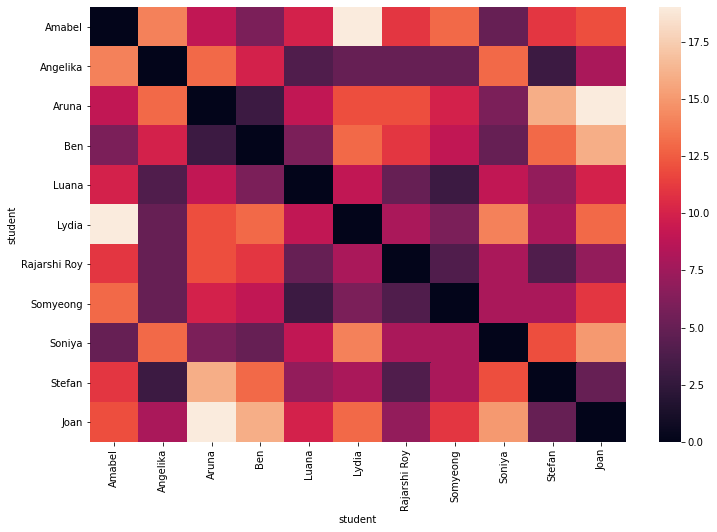

In [15]:
plt.subplots(figsize=(12, 8))
sns.heatmap(manh_dist)

#### Calculating distances for all the foods

##### Review list comprehensions

In [16]:
temp_list = [1, 2, 3, 4]
# add 1 to all this elements

temp_list_plus_1 = []
for num in temp_list: 
    temp_list_plus_1.append(num + 1)

In [17]:
temp_list_plus_1

[2, 3, 4, 5]

In [18]:
[num + 1 for num in temp_list]

[2, 3, 4, 5]

##### Apply list comprehensions

In [19]:
# can you do the same process than before for all the columns?
# create a function to do it for all the users
def manhattan_distance(data, student, student_to_compare): 
    distance = (
        pd.DataFrame({
            'student_1':data.loc[student,:],
            'student_2':data.loc[student_to_compare,:]
        })
        # applying the formula
        .assign(dist_abs = lambda x: abs(x.student_1 - x.student_2))
        .agg({'dist_abs':'sum'})[0]
    )
    return distance

distances = [[manhattan_distance(df, student, student_to_compare) for student in df.index] for student_to_compare in df.index]
manh_dist = pd.DataFrame(distances, columns=df.index, index=df.index)
manh_dist

student,Amabel,Angelika,Aruna,Ben,Luana,Lydia,Rajarshi Roy,Somyeong,Soniya,Stefan,Joan
student,,,,,,,,,,,
Amabel,0,30,16,18,34,38,36,44,25,36,42
Angelika,30,0,30,28,24,18,32,20,27,16,28
Aruna,16,30,0,18,38,26,40,38,21,42,52
Ben,18,28,18,0,22,34,28,42,27,34,38
Luana,34,24,38,22,0,34,30,30,33,34,26
Lydia,38,18,26,34,34,0,32,20,15,30,38
Rajarshi Roy,36,32,40,28,30,32,0,38,33,28,24
Somyeong,44,20,38,42,30,20,38,0,21,26,36
Soniya,25,27,21,27,33,15,33,21,0,35,39


<AxesSubplot:xlabel='student', ylabel='student'>

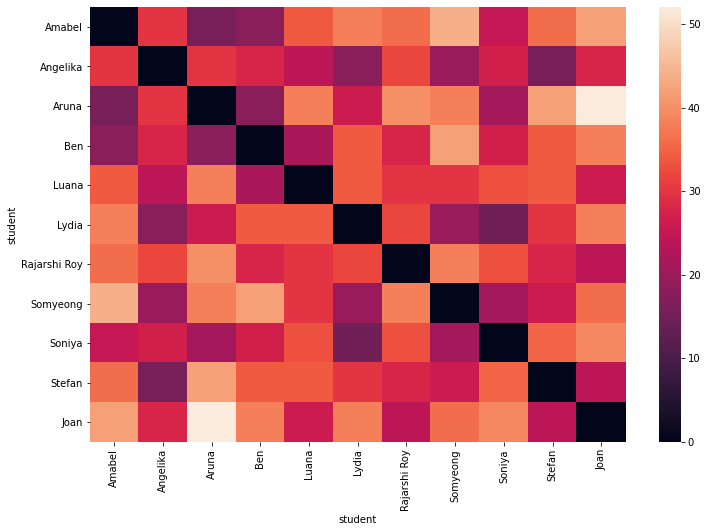

In [20]:
plt.subplots(figsize=(12, 8))
sns.heatmap(manh_dist)

### Euclidean distance

Euclidean distance: 

$$d = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 }$$

In [21]:
sample

,broccoli,brussels_sprouts,hamburger
student,,,
Amabel,5,5,0
Angelika,8,7,9


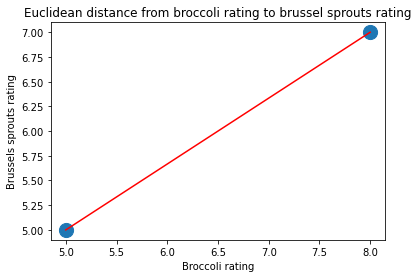

In [22]:
# plot the manhattan distance between two points
# plot rattings
plt.scatter(sample['broccoli'], sample['brussels_sprouts'], s=200)

# euclidean distance
y = [5, 7]
x = [5, 8]
plt.plot(x, y, c='r')

# plt.xlim(-1, 11)
# plt.ylim(-1, 11)
plt.title('Euclidean distance from broccoli rating to brussel sprouts rating')
plt.xlabel('Broccoli rating')
plt.ylabel('Brussels sprouts rating')
plt.show()

In [23]:
sample

,broccoli,brussels_sprouts,hamburger
student,,,
Amabel,5,5,0
Angelika,8,7,9


#### CHALLENGE: transform the euclidean distance formula to python code (and calculate the euc.dist. between all the students)

<AxesSubplot:xlabel='student', ylabel='student'>

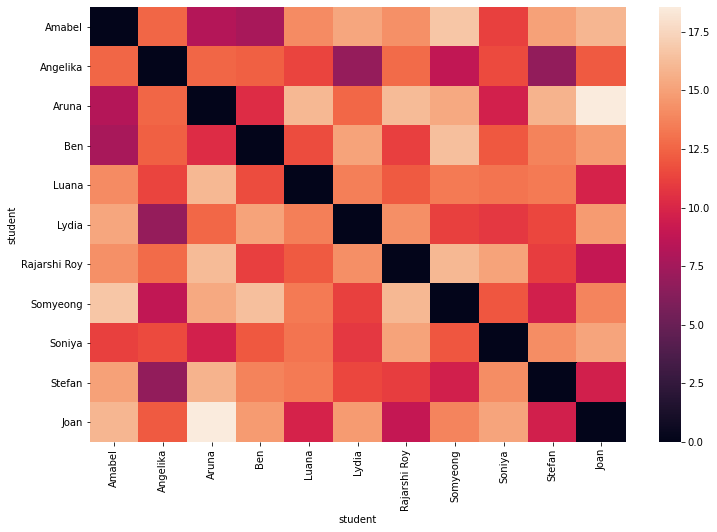

In [24]:
# can you do the same process than before for all the columns?
# create a function to do it for all the users
def euclidean_distance(data, student, student_to_compare): 
    # data = df.copy()
# student = 'Amabel'
# student_to_compare = 'Amabel'
    distance = (
        pd.DataFrame({
            'student_1':data.loc[student,:],
            'student_2':data.loc[student_to_compare,:]
        })
        # applying the formula
        .assign(dist_abs = lambda x: (x.student_1 - x.student_2)**2)
        .agg({'dist_abs':'sum'})[0]**0.5
    )
    return distance

distances = [[euclidean_distance(df, student, student_to_compare) for student in df.index] for student_to_compare in df.index]
eucl_dist = pd.DataFrame(distances, columns=df.index, index=df.index)
plt.subplots(figsize=(12, 8))
sns.heatmap(eucl_dist)

In [25]:
df.reset_index().query('student == ["Angelika","Stefan"]')

,student,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky
1,Angelika,8,7,9,4,6,10,8,2,3
9,Stefan,7,5,9,7,7,5,6,1,4


<AxesSubplot:xlabel='student', ylabel='student'>

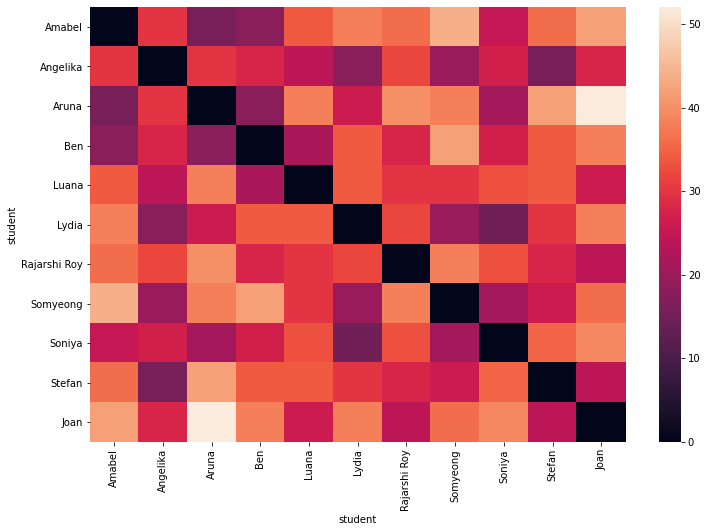

In [26]:
plt.subplots(figsize=(12, 8))
sns.heatmap(manh_dist)

In [27]:
# create a function that given a dataset, returns its distances in a dataframe
def get_distances(data, distance_type='euclidean'):
    """
    Given a dataframe, return the distance between all the indexes. 
    We assume the indexes represents the users/students. 
    Args: 
        * dataset 
        * distance type to perform the operation (euclidean or manhattan)
    """
    if distance_type == 'manhattan': 
        distances = [[manhattan_distance(data, student, student_to_compare) for student in data.index] for student_to_compare in data.index]
    else: 
        distances = [[euclidean_distance(data, student, student_to_compare) for student in data.index] for student_to_compare in data.index]
        
    return pd.DataFrame(distances, columns=data.index, index=data.index)


In [28]:
get_distances(df)

student,Amabel,Angelika,Aruna,Ben,Luana,Lydia,Rajarshi Roy,Somyeong,Soniya,Stefan,Joan
student,,,,,,,,,,,
Amabel,0.000000,12.569805,8.246211,7.745967,14.071247,15.231546,14.282857,16.673332,11.180340,15.033296,16.000000
Angelika,12.569805,0.000000,12.569805,12.328828,11.313708,6.928203,12.806248,8.831761,11.532563,6.782330,12.165525
Aruna,8.246211,12.569805,0.000000,10.295630,16.062378,12.649111,16.186414,15.362291,9.643651,15.811388,18.547237
Ben,7.745967,12.328828,10.295630,0.000000,11.661904,15.099669,11.135529,16.431677,12.041595,13.711309,14.764823
Luana,14.071247,11.313708,16.062378,11.661904,0.000000,13.564660,12.165525,13.341664,13.152946,13.341664,9.797959
Lydia,15.231546,6.928203,12.649111,15.099669,13.564660,0.000000,14.212670,11.224972,10.816654,11.401754,14.764823
Rajarshi Roy,14.282857,12.806248,16.186414,11.135529,12.165525,14.212670,0.000000,16.062378,15.132746,11.045361,8.944272
Somyeong,16.673332,8.831761,15.362291,16.431677,13.341664,11.224972,16.062378,0.000000,11.958261,9.591663,13.784049
Soniya,11.180340,11.532563,9.643651,12.041595,13.152946,10.816654,15.132746,11.958261,0.000000,14.177447,15.198684


### Data scaling

Working with variables with the same range: 

In [29]:
df = pd.read_csv('../data/food_ratings - DA002.csv', index_col='student')
df.drop('favorite_color', axis=1, inplace=True)
df

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Amabel,5,5,0,0,0,10,10,0,5,80
Angelika,8,7,9,4,6,10,8,2,3,29
Aruna,9,10,0,0,0,9,9,0,0,31
Ben,8,8,0,0,4,7,9,0,9,35
Luana,8,7,5,2,6,8,10,10,9,33
Lydia,10,9,10,0,5,10,5,4,0,30
Rajarshi Roy,9,5,7,1,2,2,4,3,10,33
Somyeong,10,7,6,10,6,10,5,6,1,34
Soniya,10,5,0,0,5,10,5,5,0,35


#### Min and Max Scaling

In that case we will use a normalization of minimum and maximum: 

$$
x' = \frac{x - min(x)}{max(x) - min(x)}
$$

If we want to normalize the column broccoli, I will take the maximum and minimum value of that column, and then I will look at each individual value to know how for it is for this two values. 

In [30]:
def min_max_scaling(col): 
    min_col = min(col)
    max_col = max(col)
    norm_val = []    
    for val in col: 
        norm_val.append((val - min_col) / (max_col - min_col))
    return norm_val

In [31]:
pd.DataFrame({
    'original': df.iloc[:,0], 
    'min_max_scaling': min_max_scaling(df.iloc[:,0])
})

,original,min_max_scaling
student,,
Amabel,5,0.0
Angelika,8,0.6
Aruna,9,0.8
Ben,8,0.6
Luana,8,0.6
Lydia,10,1.0
Rajarshi Roy,9,0.8
Somyeong,10,1.0
Soniya,10,1.0


In [32]:
# normalise all the columns on a dataset
df_norm = df.apply(min_max_scaling, axis=0).copy()
df_norm

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Amabel,0.0,0.375,0.0,0.0,0.000000,1.000,1.000000,0.0,0.5,1.000000
Angelika,0.6,0.625,0.9,0.4,0.857143,1.000,0.666667,0.2,0.3,0.019231
Aruna,0.8,1.000,0.0,0.0,0.000000,0.875,0.833333,0.0,0.0,0.057692
Ben,0.6,0.750,0.0,0.0,0.571429,0.625,0.833333,0.0,0.9,0.134615
Luana,0.6,0.625,0.5,0.2,0.857143,0.750,1.000000,1.0,0.9,0.096154
Lydia,1.0,0.875,1.0,0.0,0.714286,1.000,0.166667,0.4,0.0,0.038462
Rajarshi Roy,0.8,0.375,0.7,0.1,0.285714,0.000,0.000000,0.3,1.0,0.096154
Somyeong,1.0,0.625,0.6,1.0,0.857143,1.000,0.166667,0.6,0.1,0.115385
Soniya,1.0,0.375,0.0,0.0,0.714286,1.000,0.166667,0.5,0.0,0.134615


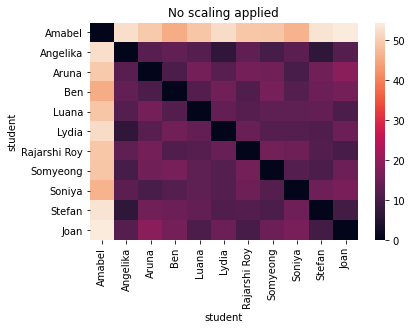

In [33]:
sns.heatmap(get_distances(df))
plt.title('No scaling applied')
plt.show()

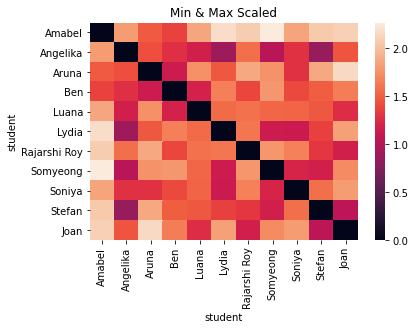

In [34]:
sns.heatmap(get_distances(df_norm))
plt.title('Min & Max Scaled')
plt.show()

In [35]:
df

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Amabel,5,5,0,0,0,10,10,0,5,80
Angelika,8,7,9,4,6,10,8,2,3,29
Aruna,9,10,0,0,0,9,9,0,0,31
Ben,8,8,0,0,4,7,9,0,9,35
Luana,8,7,5,2,6,8,10,10,9,33
Lydia,10,9,10,0,5,10,5,4,0,30
Rajarshi Roy,9,5,7,1,2,2,4,3,10,33
Somyeong,10,7,6,10,6,10,5,6,1,34
Soniya,10,5,0,0,5,10,5,5,0,35


#### Range Scaling

When we normalise the ratings, we are normalising the values between the minimum and maximum of each column, which should be 0 and 10. 
But, what happens when no one has given a rate of 0 or 10 to a food?

##### CHALLENGE: apply a range scaling on your data

In [36]:
def range_scaling(col): 
    min_col = 0
    max_col = 10
    norm_val = []
    for val in col:
        norm_val.append((val - min_col) / (max_col - min_col))
    return norm_val

In [37]:
pd.DataFrame({
    'original': df.iloc[:,0], 
    'range_scaling': range_scaling(df.iloc[:,0])
})

,original,range_scaling
student,,
Amabel,5,0.5
Angelika,8,0.8
Aruna,9,0.9
Ben,8,0.8
Luana,8,0.8
Lydia,10,1.0
Rajarshi Roy,9,0.9
Somyeong,10,1.0
Soniya,10,1.0


In [38]:
df_scaled = df.drop('age', axis=1).apply(range_scaling).copy()
df_scaled['age'] = min_max_scaling(df['age'])
df_scaled

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Amabel,0.5,0.5,0.0,0.0,0.0,1.0,1.0,0.0,0.5,1.000000
Angelika,0.8,0.7,0.9,0.4,0.6,1.0,0.8,0.2,0.3,0.019231
Aruna,0.9,1.0,0.0,0.0,0.0,0.9,0.9,0.0,0.0,0.057692
Ben,0.8,0.8,0.0,0.0,0.4,0.7,0.9,0.0,0.9,0.134615
Luana,0.8,0.7,0.5,0.2,0.6,0.8,1.0,1.0,0.9,0.096154
Lydia,1.0,0.9,1.0,0.0,0.5,1.0,0.5,0.4,0.0,0.038462
Rajarshi Roy,0.9,0.5,0.7,0.1,0.2,0.2,0.4,0.3,1.0,0.096154
Somyeong,1.0,0.7,0.6,1.0,0.6,1.0,0.5,0.6,0.1,0.115385
Soniya,1.0,0.5,0.0,0.0,0.5,1.0,0.5,0.5,0.0,0.134615


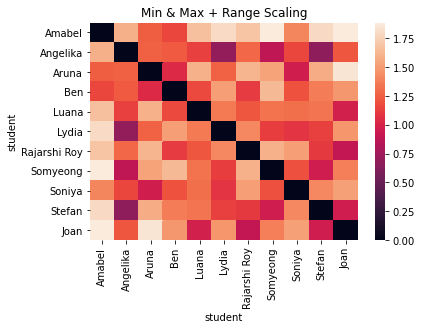

In [39]:
sns.heatmap(get_distances(df_scaled))
plt.title('Min & Max + Range Scaling')
plt.show()

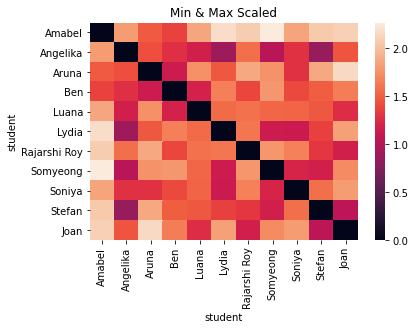

In [40]:
sns.heatmap(get_distances(df_norm))
plt.title('Min & Max Scaled')
plt.show()

### Scaling with scikit learn

In [41]:
from sklearn.preprocessing import MinMaxScaler

# What does it mean fit_transform?
df_sk_pre = MinMaxScaler().fit_transform(df)
pd.DataFrame(df_sk_pre, columns=df.columns, index=df.index)

,broccoli,brussels_sprouts,hamburger,oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,age
student,,,,,,,,,,
Amabel,0.0,0.375,0.0,0.0,0.000000,1.000,1.000000,0.0,0.5,1.000000
Angelika,0.6,0.625,0.9,0.4,0.857143,1.000,0.666667,0.2,0.3,0.019231
Aruna,0.8,1.000,0.0,0.0,0.000000,0.875,0.833333,0.0,0.0,0.057692
Ben,0.6,0.750,0.0,0.0,0.571429,0.625,0.833333,0.0,0.9,0.134615
Luana,0.6,0.625,0.5,0.2,0.857143,0.750,1.000000,1.0,0.9,0.096154
Lydia,1.0,0.875,1.0,0.0,0.714286,1.000,0.166667,0.4,0.0,0.038462
Rajarshi Roy,0.8,0.375,0.7,0.1,0.285714,0.000,0.000000,0.3,1.0,0.096154
Somyeong,1.0,0.625,0.6,1.0,0.857143,1.000,0.166667,0.6,0.1,0.115385
Soniya,1.0,0.375,0.0,0.0,0.714286,1.000,0.166667,0.5,0.0,0.134615


## K-Means algorithm

### Exploring penguins dataset

In [42]:
penguins = sns.load_dataset('penguins')
penguins.dropna(inplace=True)
penguins.drop(['species','island','sex'], axis=1, inplace=True)
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


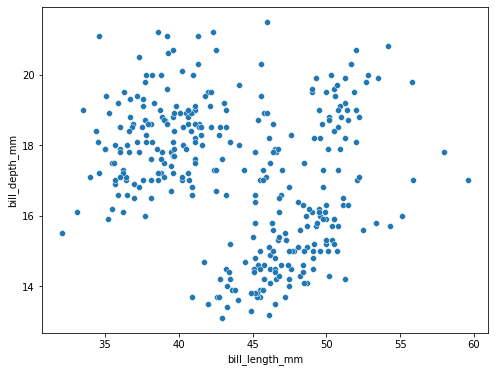

In [43]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')
plt.show()

In [44]:
peng_cl = penguins[['bill_length_mm','bill_depth_mm']]
peng_cl.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
4,36.7,19.3
5,39.3,20.6


### Data Scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler
peng_cl_norm = MinMaxScaler().fit_transform(peng_cl)

### K-means

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(peng_cl_norm)

KMeans(n_clusters=3)

In [47]:
kmeans.cluster_centers_

array([[0.64637762, 0.66703297],
       [0.24378378, 0.61357786],
       [0.54930303, 0.22480159]])

In [48]:
cl_pos = pd.DataFrame(kmeans.cluster_centers_)
cl_pos.columns = ['bill_length_mm','bill_depth_mm']
cl_pos

,bill_length_mm,bill_depth_mm
0,0.646378,0.667033
1,0.243784,0.613578
2,0.549303,0.224802


### Explore model results

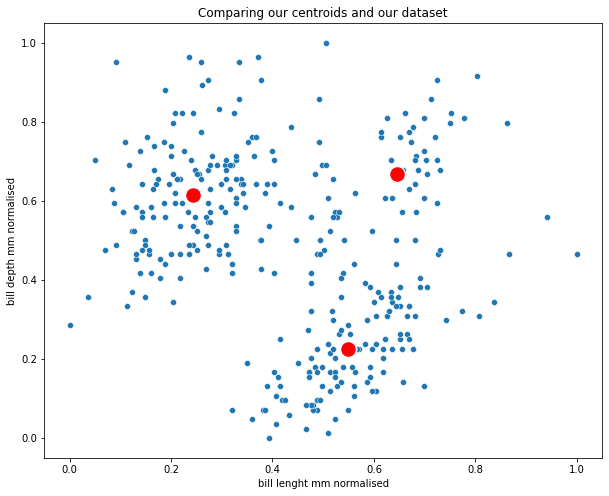

In [49]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_data = pd.DataFrame(peng_cl_norm)
plot_data.columns = ['bill_length_mm','bill_depth_mm']

plt.title('Comparing our centroids and our dataset')
plt.xlabel('bill lenght mm normalised')
plt.ylabel('bill depth mm normalised')
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm')
sns.scatterplot(data=cl_pos, x='bill_length_mm', y='bill_depth_mm', color='red', s=250)
plt.show()

In [50]:
penguins['cluster'] = kmeans.labels_
penguins.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,cluster
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,1


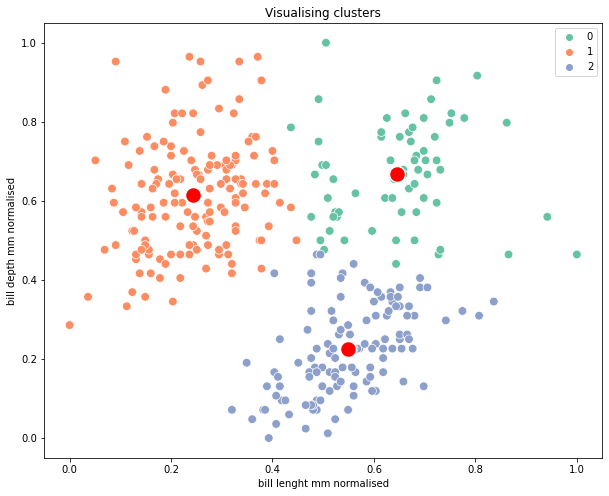

In [51]:
# create plot dataframe
plot_data = pd.DataFrame(peng_cl_norm)
plot_data.columns = ['bill_length_mm','bill_depth_mm']
plot_data['cluster'] = kmeans.labels_

# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('bill lenght mm normalised')
plt.ylabel('bill depth mm normalised')

# scatter plot
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='bill_length_mm', y='bill_depth_mm', color='red', s=250)
plt.show()

Understanding a data science process: 

![Data Science Process](https://www.researchgate.net/publication/322310310/figure/fig1/AS:611851016601600@1522888058853/CRISP-DM-methodology-Source-Chapman-et-al-2000.png)

### 2nd iteration

In [52]:
peng_cl_all = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
peng_cl_all.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


In [53]:
from sklearn.preprocessing import StandardScaler
peng_cl_all_norm = StandardScaler().fit_transform(peng_cl_all)

kmeans_all = KMeans(n_clusters=3)
kmeans_all.fit(peng_cl_all_norm)

KMeans(n_clusters=3)

In [54]:
kmeans_all.cluster_centers_

array([[-1.04680889,  0.48662566, -0.88169491, -0.7627539 ],
       [ 0.67202511,  0.80526339, -0.28934658, -0.38410387],
       [ 0.65475809, -1.10270671,  1.16246305,  1.10121078]])

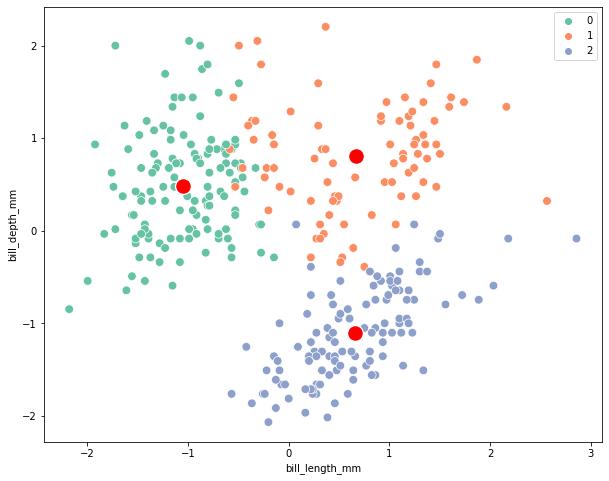

In [55]:
cl_pos = pd.DataFrame(kmeans_all.cluster_centers_)
cl_pos.columns = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
cl_pos

fig, ax = plt.subplots(figsize=(10, 8))

plot_data = pd.DataFrame(peng_cl_all_norm)
plot_data.columns = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
plot_data['cluster'] = kmeans_all.labels_

sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=cl_pos, x='bill_length_mm', y='bill_depth_mm', color='red', s=250)
plt.show()

Note: use spyder charts

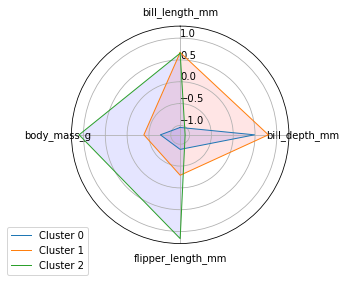

In [56]:
# Source: https://www.python-graph-gallery.com/391-radar-chart-with-several-individuals
# Libraries
from math import pi
 
# Set data
radar_df = cl_pos.reset_index().rename(columns={'index':'cluster'})
 
# ------- PART 1: Create background
 
# number of variable
categories= radar_df.columns.tolist()[1:]
# list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks(ticks=None, labels=None)
# plt.ylim(0,40)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

# Ind1
values=radar_df.loc[0].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 0")
ax.fill(angles, values, 'b', alpha=0.1)

# Ind2
values=radar_df.loc[1].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 1")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind3
values=radar_df.loc[2].drop('cluster').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle=None, label="Cluster 2")
ax.fill(angles, values, 'b', alpha=0.1)

# # Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the graph
plt.show()

## Example 10 songs

In [57]:
spotify = pd.read_csv('../data/df_audio_features.csv')
spotify.head()

,song_name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,My Band,D12,0.851,0.849,1,-3.383,0,0.0828,0.4970,0.000002,0.1160,0.844,120.014,298773,4
1,The Real Slim Shady,Eminem,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,284200,4
2,Águas De Março,Antônio Carlos Jobim,0.642,0.339,3,-15.503,1,0.1400,0.8540,0.000000,0.1050,0.491,143.418,212400,4
3,The Girl From Ipanema,Stan Getz,0.641,0.140,8,-16.790,1,0.0390,0.8670,0.001660,0.1050,0.388,129.318,317987,4
4,"Paint It, Black",The Rolling Stones,0.464,0.795,1,-9.267,1,0.0926,0.0493,0.002440,0.3990,0.612,158.691,202267,4


In [58]:
sp_temp = spotify.set_index(['song_name','artist']).copy()
sp_temp.head()

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,artist,,,,,,,,,,,,,
My Band,D12,0.851,0.849,1,-3.383,0,0.0828,0.4970,0.000002,0.1160,0.844,120.014,298773,4
The Real Slim Shady,Eminem,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,284200,4
Águas De Março,Antônio Carlos Jobim,0.642,0.339,3,-15.503,1,0.1400,0.8540,0.000000,0.1050,0.491,143.418,212400,4
The Girl From Ipanema,Stan Getz,0.641,0.140,8,-16.790,1,0.0390,0.8670,0.001660,0.1050,0.388,129.318,317987,4
"Paint It, Black",The Rolling Stones,0.464,0.795,1,-9.267,1,0.0926,0.0493,0.002440,0.3990,0.612,158.691,202267,4


In [59]:
# scale the columns
for col in sp_temp.columns:
    min_col = min(sp_temp[col])
    max_col = max(sp_temp[col])
    norm_val = []
    for val in sp_temp[col]: 
        norm_val.append((val - min_col) / (max_col - min_col))
    sp_temp[col] = norm_val
        
sp_temp

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,artist,,,,,,,,,,,,,
My Band,D12,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0
The Real Slim Shady,Eminem,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0
Águas De Março,Antônio Carlos Jobim,0.598693,0.393341,0.285714,0.597610,1.0,1.000000,0.862189,0.000000,0.168552,0.494949,0.842866,0.311930,1.0
The Girl From Ipanema,Stan Getz,0.597386,0.156625,1.000000,0.554880,1.0,0.075938,0.875362,0.001818,0.168552,0.376722,0.697799,0.632941,1.0
"Paint It, Black",The Rolling Stones,0.366013,0.935766,0.000000,0.804648,1.0,0.566331,0.046775,0.002673,1.000000,0.633838,1.000000,0.281123,1.0
Sultans Of Swing,Dire Straits,0.717647,0.934576,0.571429,0.779548,1.0,0.000000,0.059036,0.040197,0.804864,1.000000,0.891797,0.726085,1.0
Space Raiders - Charlotte de Witte Remix,Eats Everything,0.738562,0.859636,0.428571,0.751594,1.0,0.707228,0.000000,0.949617,0.185520,0.000000,0.725362,1.000000,1.0
In Silence,Amelie Lens,0.721569,0.995242,0.000000,0.713347,1.0,0.064044,0.002371,0.986857,0.185520,0.158632,0.684332,0.863249,1.0
"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Johannes Brahms,0.000000,0.000000,0.285714,0.000000,1.0,0.193962,0.998987,0.652793,0.165724,0.173554,0.000484,0.000000,0.0


In [60]:
# understand an specific example
sp_sample = sp_temp.iloc[:2,:]
sp_sample

,,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
song_name,artist,,,,,,,,,,,,,
My Band,D12,0.871895,1.000000,0.000000,1.000000,0.0,0.476670,0.500436,0.000002,0.199661,0.900138,0.602076,0.574526,1.0
The Real Slim Shady,Eminem,1.000000,0.776369,0.571429,0.971414,0.0,0.242452,0.027420,0.000000,0.000000,0.803719,0.442503,0.530220,1.0


In [61]:
first_song = sp_temp.iloc[0,0]
sec_song = sp_temp.iloc[0,1]
print(first_song, sec_song)

0.8718954248366014 1.0


In [62]:
((first_song - sec_song)**2 + (0)**2 + (0)**2)**0.5

0.12810457516339857

In [65]:
get_distances(sp_temp)

,song_name,My Band,The Real Slim Shady,Águas De Março,The Girl From Ipanema,"Paint It, Black",Sultans Of Swing,Space Raiders - Charlotte de Witte Remix,In Silence,"Wiegenlied, Op. 49, No. 4 (Arr. for Cello and Piano) [Brahms Lullaby]",Nocturne en mi bémol majeur opus 9 n°2: Ballade en Sol Mineur No.1
,artist,D12,Eminem,Antônio Carlos Jobim,Stan Getz,The Rolling Stones,Dire Straits,Eats Everything,Amelie Lens,Johannes Brahms,Frédéric Chopin
song_name,artist,,,,,,,,,,
My Band,D12,0.000000,0.865424,1.543712,1.890353,1.570970,1.519874,1.869464,1.771203,2.611037,2.335151
The Real Slim Shady,Eminem,0.865424,0.000000,1.769612,1.713638,1.813472,1.459289,1.801010,1.773372,2.627079,2.336751
Águas De Março,Antônio Carlos Jobim,1.543712,1.769612,0.000000,1.249081,1.435993,1.703637,1.656648,1.871919,1.968514,1.793372
The Girl From Ipanema,Stan Getz,1.890353,1.713638,1.249081,0.000000,1.903296,1.538547,1.794488,1.891412,1.892255,1.535254
"Paint It, Black",The Rolling Stones,1.570970,1.813472,1.435993,1.903296,0.000000,1.074686,1.705039,1.639784,2.488509,2.324324
Sultans Of Swing,Dire Straits,1.519874,1.459289,1.703637,1.538547,1.074686,0.000000,1.686493,1.546424,2.605251,2.309939
Space Raiders - Charlotte de Witte Remix,Eats Everything,1.869464,1.801010,1.656648,1.794488,1.705039,1.686493,0.000000,0.815132,2.403171,1.829474
In Silence,Amelie Lens,1.771203,1.773372,1.871919,1.891412,1.639784,1.546424,0.815132,0.000000,2.331705,1.732820


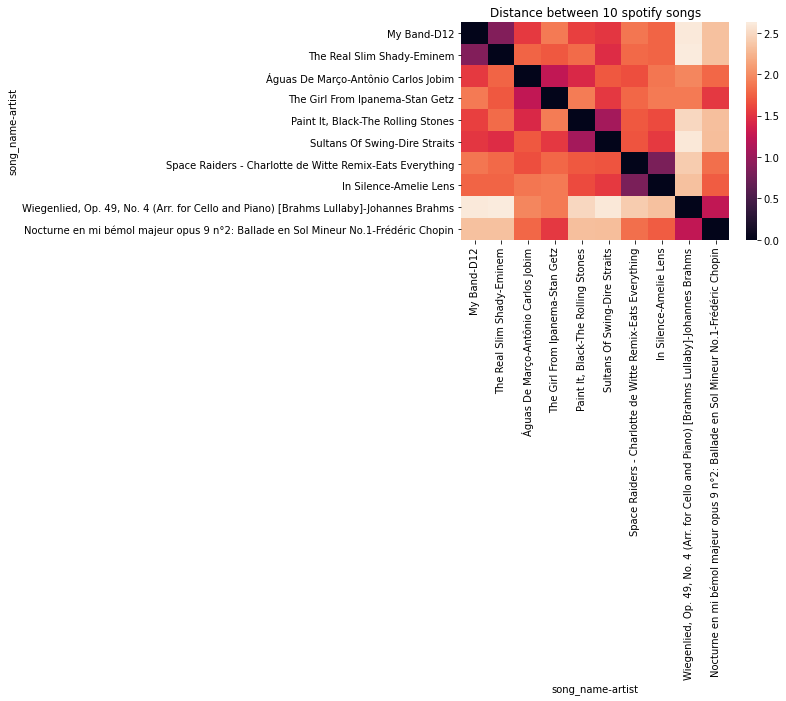

In [66]:
plt.title('Distance between 10 spotify songs')
sns.heatmap(get_distances(sp_temp))
plt.show()

## Model performance evaluation

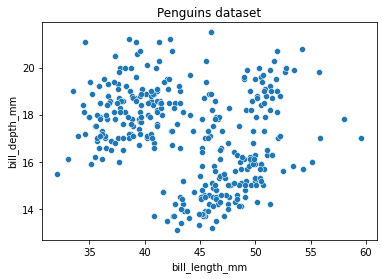

In [168]:
penguins = sns.load_dataset('penguins')

penguins.dropna(inplace=True)
plt.title('Penguins dataset')
sns.scatterplot(data=penguins, x='bill_length_mm',	y='bill_depth_mm')
plt.show()

In [169]:
columns = ['bill_length_mm', 'bill_depth_mm']

peng_sample = penguins.filter(columns)
peng_sample.head(3)

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0


In [170]:
from sklearn.preprocessing import MinMaxScaler
peng_norm = MinMaxScaler().fit_transform(peng_sample)
pd.DataFrame(peng_norm).head()

,0,1
0,0.254545,0.666667
1,0.269091,0.511905
2,0.298182,0.583333
3,0.167273,0.738095
4,0.261818,0.892857


In [171]:
from sklearn.cluster import KMeans
peng_kmeans = KMeans(n_clusters=3).fit(peng_norm)

peng_kmeans

KMeans(n_clusters=3)

### Evaluation with graphs

In [172]:
columns = ['bill_length_mm', 'bill_depth_mm']

centroids = pd.DataFrame(peng_kmeans.cluster_centers_)
centroids.columns = columns
centroids

,bill_length_mm,bill_depth_mm
0,0.646378,0.667033
1,0.243784,0.613578
2,0.549303,0.224802


In [173]:
plot_data = pd.DataFrame(peng_norm)
plot_data.columns = columns
plot_data['cluster'] = peng_kmeans.labels_#peng_kmeans.predict(peng_norm)
plot_data.head()

,bill_length_mm,bill_depth_mm,cluster
0,0.254545,0.666667,1
1,0.269091,0.511905,1
2,0.298182,0.583333,1
3,0.167273,0.738095,1
4,0.261818,0.892857,1


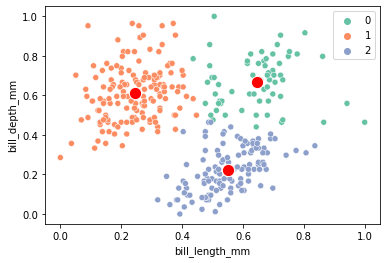

In [174]:
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids, x='bill_length_mm', y='bill_depth_mm', color='red', s=150)
plt.show()

### Evaluate when checking the distance between centroids

In [175]:
centroids

,bill_length_mm,bill_depth_mm
0,0.646378,0.667033
1,0.243784,0.613578
2,0.549303,0.224802


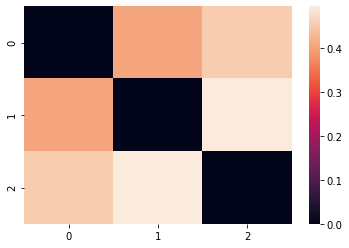

In [179]:
sns.heatmap(get_distances(centroids))
plt.show()

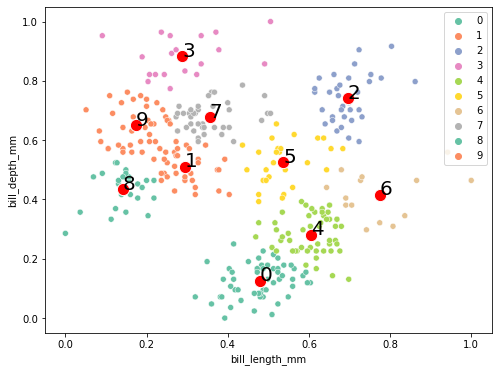

In [181]:
temp_kmeans = KMeans(n_clusters=10).fit(peng_norm)

centroids_temp = pd.DataFrame(temp_kmeans.cluster_centers_)
centroids_temp.columns = columns
centroids_temp['cluster_name'] = centroids_temp.index

plot_data['cluster'] = temp_kmeans.labels_

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids_temp, x='bill_length_mm', y='bill_depth_mm', color='red', s=150)
for i in range(centroids_temp.shape[0]):
    plt.text(
        x=centroids_temp['bill_length_mm'][i], 
        y=centroids_temp['bill_depth_mm'][i],
        s=centroids_temp['cluster_name'][i], 
        size=20
    )
plt.show()

dist_temp = get_distances(centroids_temp.drop('cluster_name', axis=1))

### Using inertia

In [182]:
peng_kmeans.inertia_

8.769486294749541

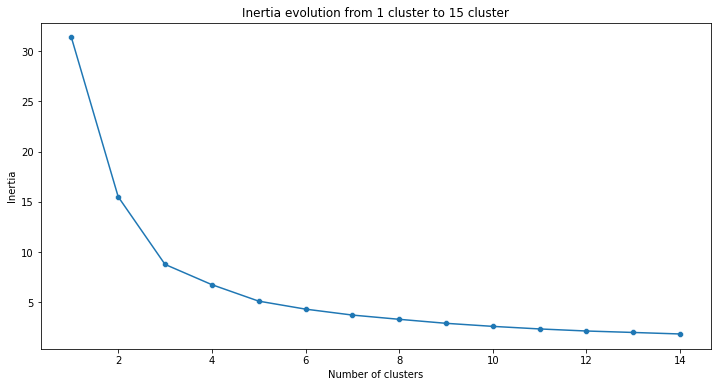

In [183]:
max_k = 15
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(peng_norm).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia)
sns.scatterplot(x=range(1, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Food ratings example

In [184]:
food = pd.read_csv('../data/food_example.csv', delimiter=';')
food.drop('age', axis=1, inplace=True)
food.set_index('students', inplace=True)
food

,broccoli,brussels_sprouts,hamburger,oysters,onion,peas,olives,blue_cheese,whisky
students,,,,,,,,,
Markus,1,2,3,4,5,6,7,8,9
Peter,0,8,7,7,5,6,4,3,8
Shikha,1,7,3,5,9,3,5,2,0
Hashim,7,4,7,3,0,8,3,2,6
Lina,8,6,4,3,7,2,9,3,4
David,9,6,2,2,2,4,2,1,5
Khader,7,7,5,4,3,9,2,6,1
Archana,0,5,4,3,2,8,4,2,1
Vitaly,9,4,3,1,8,4,9,3,2


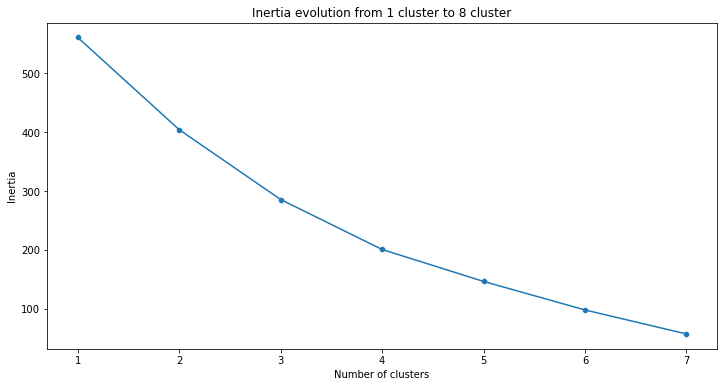

In [185]:
max_k = 8
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(food).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia)
sns.scatterplot(x=range(1, max_k), y=inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

### Silhouette Score

In [186]:
from sklearn.metrics import silhouette_score
silhouette_score(peng_norm, peng_kmeans.labels_)

0.5139272799995429

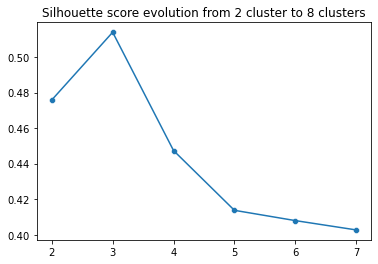

In [187]:
max_k = 8
sil_score = []

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(peng_norm).labels_
    sil_score.append(silhouette_score(peng_norm, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score)
sns.scatterplot(x=range(2, max_k), y=sil_score)
plt.show()

The silhouette coefficient can vary between -1 and +1: 

|   |   |
|---|---|
|+1   | the instance is well inside its own cluster and far from other clusters.  |
|0   | the instance is close to a cluster boundary.   |
|-1   | the instance may have been assigned to the wrong cluster.  |

* For k = 2 the average to silhouette is: 0.4758
	- For cluster = 0 the silhouette value is: 0.6
	- For cluster = 1 the silhouette value is: 0.4


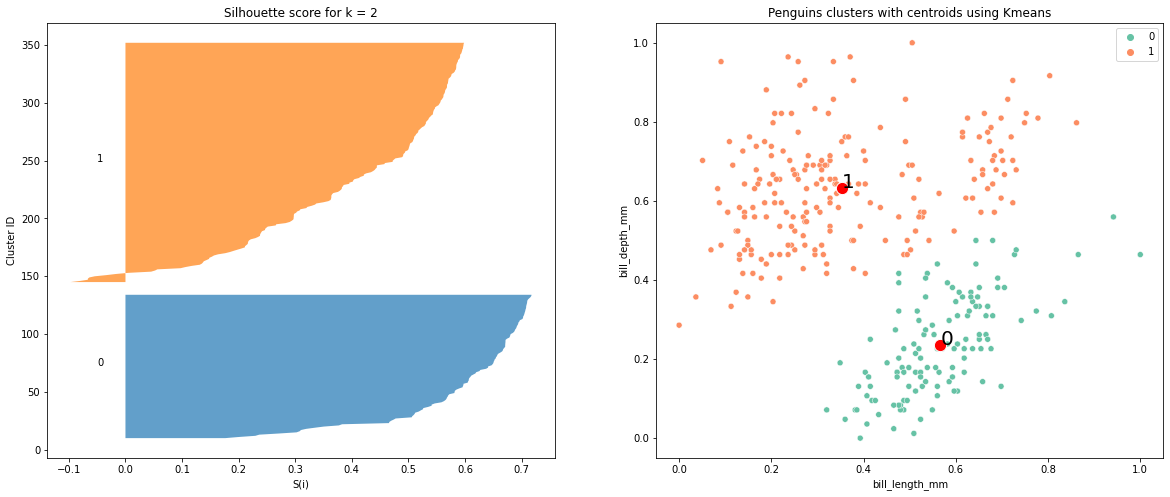

* For k = 3 the average to silhouette is: 0.5139
	- For cluster = 0 the silhouette value is: 0.5
	- For cluster = 1 the silhouette value is: 0.57
	- For cluster = 2 the silhouette value is: 0.45


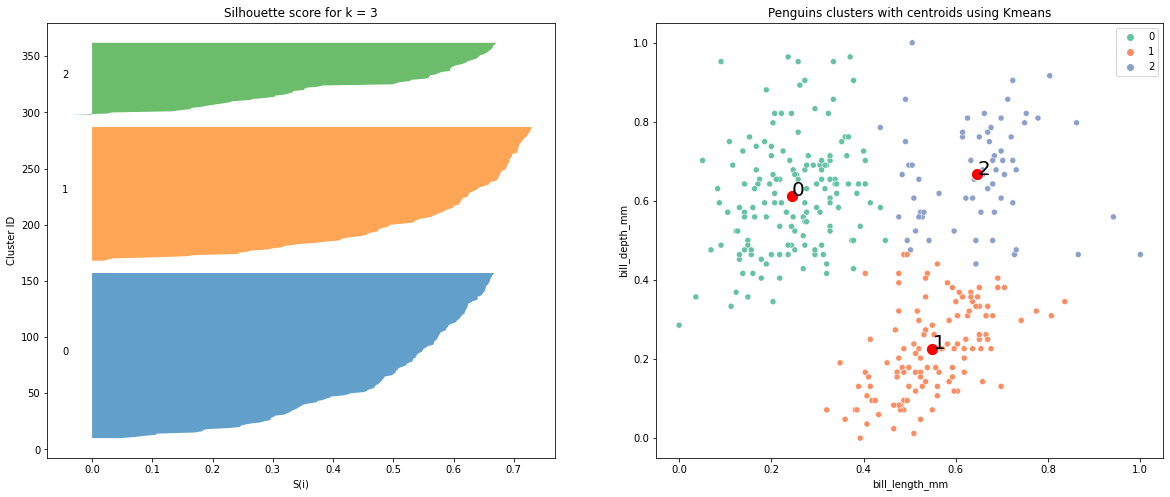

* For k = 4 the average to silhouette is: 0.4472
	- For cluster = 0 the silhouette value is: 0.55
	- For cluster = 1 the silhouette value is: 0.34
	- For cluster = 2 the silhouette value is: 0.42
	- For cluster = 3 the silhouette value is: 0.42


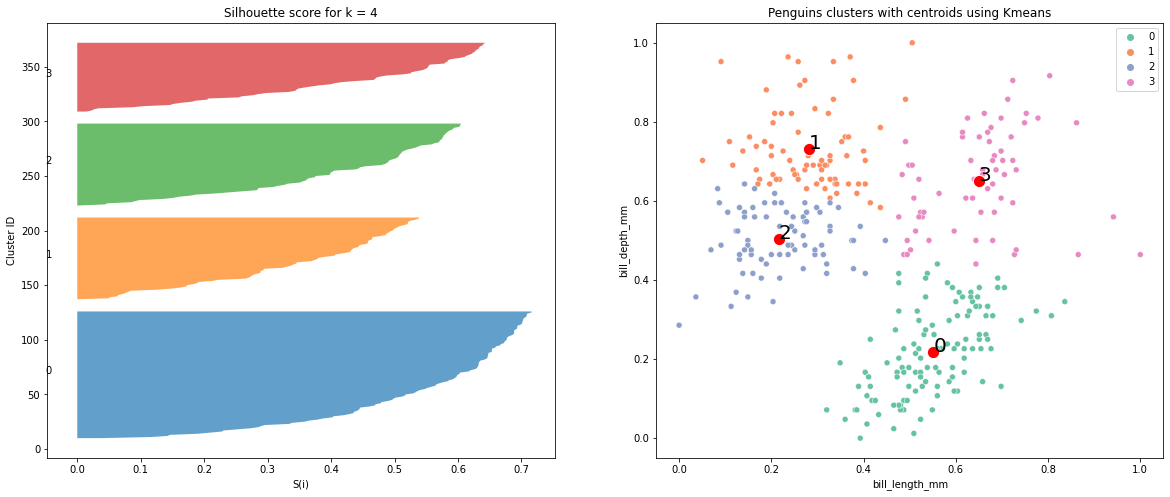

* For k = 5 the average to silhouette is: 0.4137
	- For cluster = 0 the silhouette value is: 0.36
	- For cluster = 1 the silhouette value is: 0.33
	- For cluster = 2 the silhouette value is: 0.45
	- For cluster = 3 the silhouette value is: 0.52
	- For cluster = 4 the silhouette value is: 0.42


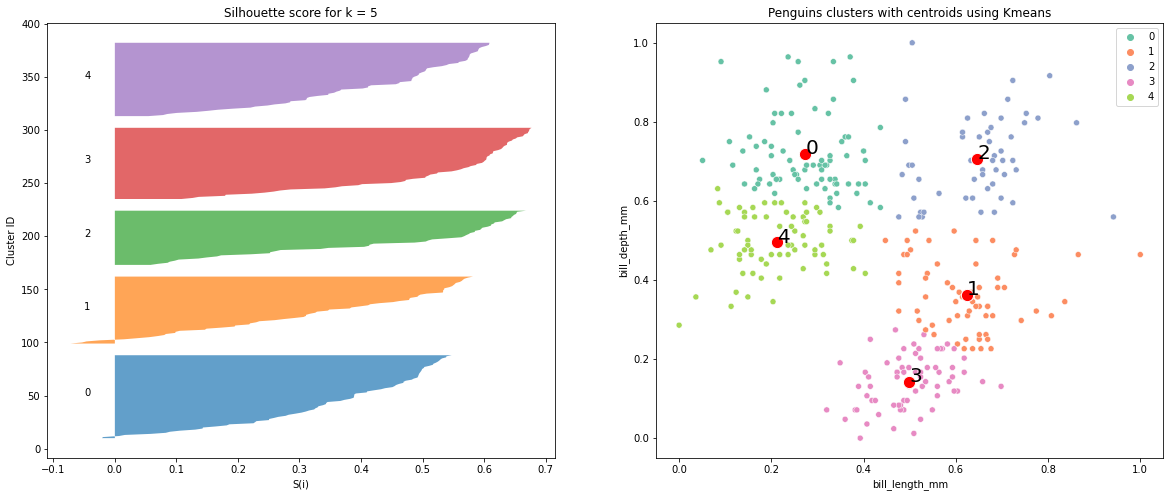

* For k = 6 the average to silhouette is: 0.4102
	- For cluster = 0 the silhouette value is: 0.35
	- For cluster = 1 the silhouette value is: 0.38
	- For cluster = 2 the silhouette value is: 0.48
	- For cluster = 3 the silhouette value is: 0.42
	- For cluster = 4 the silhouette value is: 0.5
	- For cluster = 5 the silhouette value is: 0.32


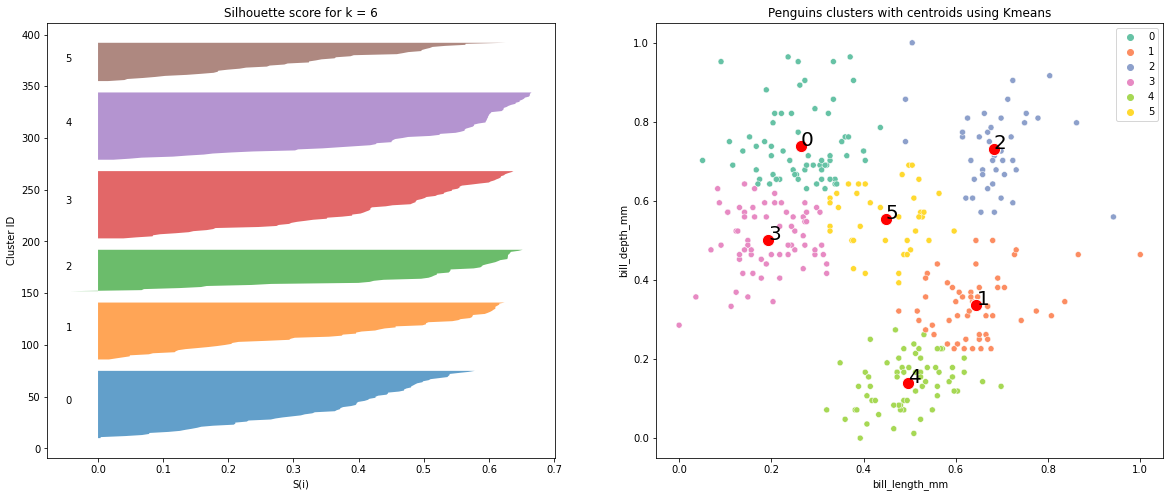

* For k = 7 the average to silhouette is: 0.4003
	- For cluster = 0 the silhouette value is: 0.39
	- For cluster = 1 the silhouette value is: 0.37
	- For cluster = 2 the silhouette value is: 0.46
	- For cluster = 3 the silhouette value is: 0.36
	- For cluster = 4 the silhouette value is: 0.52
	- For cluster = 5 the silhouette value is: 0.35
	- For cluster = 6 the silhouette value is: 0.32


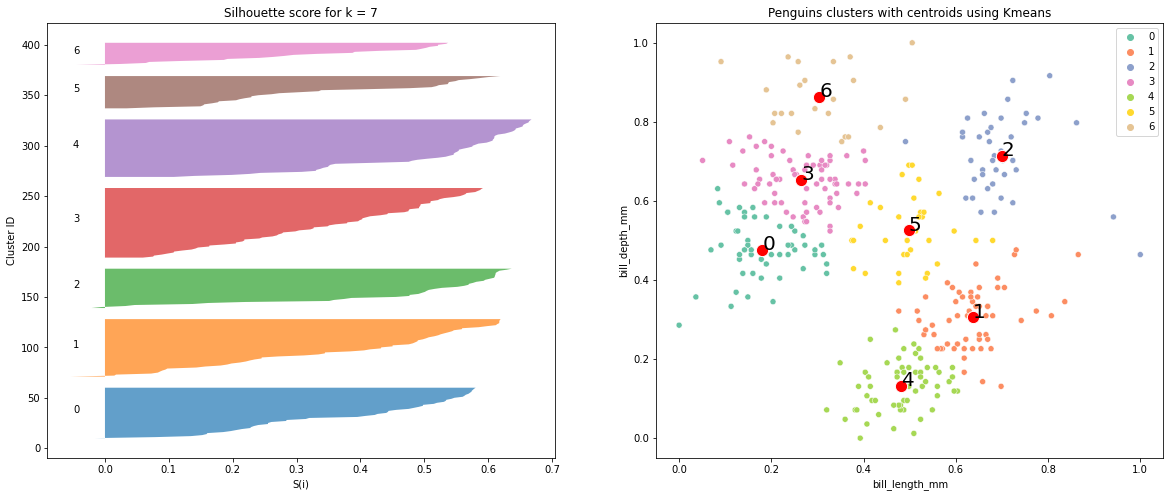

In [188]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

max_k = 8
data = peng_norm

for k in range(1, max_k): 
    kmean_model = KMeans(n_clusters=k).fit(data)
    labels = kmean_model.labels_
    
    if 1 < k < data.shape[0]: 
        
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)
        
        sil_avg = silhouette_score(data, labels)
        print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)
        
        y_lower = 10
        
        for i in range(k): 
            ith_cluster_sv = sample_sil_val[labels == i]
            print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")
            
            ith_cluster_sv.sort()
            
            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
 
            
            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, 
                                alpha = 0.7)
            
            
            # Label teh cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
            
            # Callcyalte teh next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 #dejamos vacías 10 posiciones sin muestra
            
        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")

    if 1 < k: 
        centr_df_temp = pd.DataFrame(kmean_model.cluster_centers_)
        centr_df_temp.columns = columns
        centr_df_temp['cluster_name'] = centr_df_temp.index

        plot_data = pd.DataFrame(data)
        plot_data.columns = columns
        plot_data['cluster'] = kmean_model.predict(data)

        plt.title('Penguins clusters with centroids using Kmeans')
        sns.scatterplot(data=plot_data, x= 'bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2')
        sns.scatterplot(data=centr_df_temp, x= 'bill_length_mm', y='bill_depth_mm', color='red', s=150)
        for i in range(centr_df_temp.shape[0]):
            plt.text(
                x=centr_df_temp.bill_length_mm[i], 
                y=centr_df_temp.bill_depth_mm[i],
                s=centr_df_temp.cluster_name[i], 
                size=20
            )
        plt.show()

Extra: 

* DBSCAN 
* Spotify API